# 필요 라이브러리 설치

In [12]:
!pip install pandas
!pip install pyLDAvis
!pip install warnings

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


You should consider upgrading via the '/home/ubuntu/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ubuntu/anaconda3/bin/python -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings
You should consider upgrading via the '/home/ubuntu/anaconda3/bin/python -m pip install --upgrade pip' command.


# import

In [15]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from collections import Counter
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리
from sklearn.decomposition import PCA
import pyLDAvis.gensim_models
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
from sklearn.cluster import KMeans
import warnings

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
warnings.filterwarnings(action='ignore')

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 파일 로드

In [17]:
# 유튜브 크롤링 파일 로드
path = '/home/lab10/final/pre/'

comment_file = 'prepro_stats_page_640세븐틴.csv'    #
data = pd.read_csv(path+comment_file, encoding='utf-8', header=None)
data.columns = ['comment','like','lang']
print(len(data))
data.head()

81975


,comment,like,lang
0,even if you re not a carat let s all admit it ...,28000.0,(en)
1,this song tells that some song s don t need bi...,1900.0,(en)
2,외국분들 댓글 너무 착하셔세봉이들이 보고 감동했으면 좋겠네요,72.0,(ko)
3,not a fan but i should say that this song is o...,625.0,(en)
4,4 years have passed and this song is still a l...,96.0,(en)


In [18]:
# data.like.describe(percentiles=[0.75])
# 좋아요 갯수 일정갯수 이상 만 
# idx=data[data['like']<=323].index              #좋아요 갯수 상위 15000 정도 이상 댓글만 남김
# data.drop(idx, inplace=True)

# data_2 = data[data.like >=100]
# len(data_2)

data_ko = pd.DataFrame([kor[:1] for kor in data.values if kor[2] == '(ko)'], columns=['comment'])
data_en = pd.DataFrame([en[:1] for en in data.values if en[2] == '(en)'], columns=['comment'])
data_en.comment.values

array(['even if you re not a carat let s all admit it this song is universal',
       'this song tells that some song s don t need billion views to prove they are legendary ❤️',
       'not a fan but i should say that this song is on another level',
       ..., 'novesuity dino thank you tho 🥰',
       'lui quinto did you watch seventeen project big debut already and hit the road',
       '막내온탑 seventeen im currently watching those'], dtype=object)

In [19]:
data_ko.comment.values

array(['외국분들 댓글 너무 착하셔세봉이들이 보고 감동했으면 좋겠네요',
       '조회수뭐야 나 이런 발라드가 외국에서 통하는 거 처음봐 맨날 퍼포퍼포 만 외국에서 열광하는데',
       '이노래는 그냥 빌보드 가야지 정상 빌보드 안가면 나 슬플거야 빌보드에 안올라가도 난 세븐틴 사랑해 줄 자신이있어 2 35 이부분 진짜 좋음',
       ...,
       '지금 몇번째 보는건지 모르겠어요 너무 조아여 이번 곡 그것두 팬들한테 쓰는거라니너무 슬픈것 같아요타팬도 슬픈데 캐럿들은 얼마나 슬푸실까요',
       '세븐틴 예술 seventeen art', '실종사건 8'], dtype=object)

In [20]:
for i in range(len(data_en.comment)):
    data_en.comment[i] = str(data_en.comment[i])

In [21]:
# 숫자제거 / 밑줄 제외한 특수문자 제거
p = re.compile("[0-7]+")
z = re.compile("[8-9]+")
q = re.compile("\W+")
r = re.compile('[^a-zA-Z]+')

en = []
for i in data_en.comment.values:
    tokens = re.sub(p," ",i)
    tokens = re.sub(z," ",tokens)
    tokens = re.sub(q," ",tokens)
    tokens = re.sub(r," ", tokens)
    en.append(tokens)
len(en)

68832

In [22]:
en[:2]

['even if you re not a carat let s all admit it this song is universal',
 'this song tells that some song s don t need billion views to prove they are legendary ']

# 불용어 제거

In [23]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/lab10/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/lab10/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lab10/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
stop_words = set(stopwords.words('english')) 
# stop_words.update(('song','group','songs','youtube','views','time','https','girl','girls','people','yes','lol','video','part','member','members', 'look','way','guys','fans','fan'))

res=[]
for i in range(len(en)):
    word_tokens = word_tokenize(en[i])

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 
    res.append(result)

# print(word_tokens) 
print(res[:10])
print(len(res))

[['even', 'carat', 'let', 'admit', 'song', 'universal'], ['song', 'tells', 'song', 'need', 'billion', 'views', 'prove', 'legendary'], ['fan', 'say', 'song', 'another', 'level'], ['years', 'passed', 'song', 'still', 'legend', 'probably', 'legacy', 'passed', 'different', 'generation', 'generation', 'attacca', 'released', 'october', 'hope', 'able', 'reach', 'new', 'milestone', 'boys', 'lately', 'previous', 'comebacks', 'struggle', 'make', 'views', 'go', 'together', 'almost', 'years', 'ripe', 'already', 'still', 'lack', 'effort', 'whilst', 'seventeen', 'work', 'hard', 'satisfy', 'us', 'every', 'menu', 'aim', 'make', 'us', 'taste', 'unending', 'gose', 'segments', 'contents', 'hope', 'able', 'pay', 'back'], ['fan', 'really', 'like', 'songs', 'especially', 'one', 'deserves', 'attention', 'views'], ['funfact', 'everyone', 'agree', 'successful', 'comeback', 'seventeen'], ['proof', 'choreography', 'need', 'jumps', 'flips', 'beautifully', 'done', 'goes', 'well', 'music', 'probably', 'one', 'favor

In [25]:
en_pos = []
for i in range(len(res)):
    tokens_pos = nltk.pos_tag(res[i])
    en_pos.append(tokens_pos)

en_pos[:5]

[[('even', 'RB'),
  ('carat', 'VB'),
  ('let', 'JJR'),
  ('admit', 'NN'),
  ('song', 'NN'),
  ('universal', 'NN')],
 [('song', 'NN'),
  ('tells', 'NNS'),
  ('song', 'JJ'),
  ('need', 'VBP'),
  ('billion', 'CD'),
  ('views', 'NNS'),
  ('prove', 'VBP'),
  ('legendary', 'JJ')],
 [('fan', 'NNS'),
  ('say', 'VBP'),
  ('song', 'RB'),
  ('another', 'DT'),
  ('level', 'NN')],
 [('years', 'NNS'),
  ('passed', 'VBD'),
  ('song', 'NN'),
  ('still', 'RB'),
  ('legend', 'VBZ'),
  ('probably', 'RB'),
  ('legacy', 'NN'),
  ('passed', 'VBD'),
  ('different', 'JJ'),
  ('generation', 'NN'),
  ('generation', 'NN'),
  ('attacca', 'NNS'),
  ('released', 'VBN'),
  ('october', 'IN'),
  ('hope', 'NN'),
  ('able', 'JJ'),
  ('reach', 'NN'),
  ('new', 'JJ'),
  ('milestone', 'NN'),
  ('boys', 'VBZ'),
  ('lately', 'RB'),
  ('previous', 'JJ'),
  ('comebacks', 'NNS'),
  ('struggle', 'VBP'),
  ('make', 'VB'),
  ('views', 'NNS'),
  ('go', 'VB'),
  ('together', 'RB'),
  ('almost', 'RB'),
  ('years', 'NNS'),
  ('ripe', 

In [26]:
# 명사는 NN을 포함하고 있음을 알 수 있음
en_NN=[]
for i in range(len(en_pos)):
    NN_words = []
    for word, pos in en_pos[i]:
        if 'NN' in pos:
            NN_words.append(word)
        elif 'NNS' in pos:
            NN_words.append(word)
    en_NN.extend(NN_words)
en_NN[:10]


['admit',
 'song',
 'universal',
 'song',
 'tells',
 'views',
 'fan',
 'level',
 'years',
 'song']

In [27]:
#9. 빈도분석

c = Counter(en_NN) # input type should be a list of words (or tokens)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

[('carats', 5472), ('song', 4939), ('carat', 3741), ('seventeen', 3214), ('thank', 2410), ('time', 2274), ('home', 2263), ('love', 2129), ('life', 2126), ('group', 2021), ('views', 2002), ('songs', 1964), ('music', 1868), ('svt', 1868), ('mv', 1794), ('thanks', 1790), ('day', 1786), ('people', 1552), ('diamond', 1541), ('comeback', 1445)]


In [28]:
#wordclound
noun_text = ''
for word in en_NN:
    noun_text = noun_text +' '+word


In [32]:
path2='/home/lab10/final/'
filename = 'stats_page_640세븐틴'

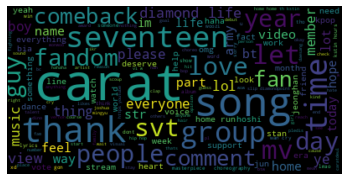

In [33]:
wordcloud = WordCloud(max_font_size=60, relative_scaling=.5).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file(path2+'wordcloud'+filename+'.png')


In [34]:
## 3단어 이하 짧은 단어 제거
 # remove words less than three letters
# print(res[1])
# for word in res[1]:
#     print(word)
en_sent_less3=[]
for i in range(len(res)):
    tokens = [word for word in res[i] if len(word) >= 3]
    en_sent_less3.append(tokens)
en_sent_less3[:2]

[['even', 'carat', 'let', 'admit', 'song', 'universal'],
 ['song', 'tells', 'song', 'need', 'billion', 'views', 'prove', 'legendary']]

In [35]:
en_sent =[]
for i in range(len(en_sent_less3)):
    temp=" ".join(en_sent_less3[i])
    en_sent.append(temp)
en_sent[:15]


['even carat let admit song universal',
 'song tells song need billion views prove legendary',
 'fan say song another level',
 'years passed song still legend probably legacy passed different generation generation attacca released october hope able reach new milestone boys lately previous comebacks struggle make views together almost years ripe already still lack effort whilst seventeen work hard satisfy every menu aim make taste unending gose segments contents hope able pay back',
 'fan really like songs especially one deserves attention views',
 'funfact everyone agree successful comeback seventeen',
 'proof choreography need jumps flips beautifully done goes well music probably one favorites also video choreography danced speed left awe well synchronized',
 'forget fandom carat comes song',
 'proves songs need badass become addictive',
 'seventeen stan like guys deserves views likes masterpiece',
 'today wan cry year anniversary thank seventeen give masterpiece song',
 'remember wat

In [104]:
data_en['en_sent']=en_sent

In [106]:
data_en.tail()

,comment,en_sent
68827,im updated but i want to binge watch more svt ...,updated want binge watch svt videos
68828,anyways im currently binge watching their vliv...,anyways currently binge watching vlives help
68829,novesuity dino thank you tho 🥰,novesuity dino thank tho
68830,lui quinto did you watch seventeen project big...,lui quinto watch seventeen project big debut a...
68831,막내온탑 seventeen im currently watching those,seventeen currently watching


In [107]:
# BoW 모델로 벡터화
count = CountVectorizer(ngram_range=(3,6),
                        max_df = .1,
                        max_features=5000, stop_words=None)
docs = en_sent
bag = count.fit_transform(docs)


In [108]:
def perplexity_by_ntopic(data, ntopics):
    output_dict = {
        "Number Of Topics": [],
        "Perplexity Score": []
    }
    for t in ntopics:
        # LDA 사용 (BoW 기반)
        
        lda = LatentDirichletAllocation(
            n_components=t,
            learning_method='batch',
            random_state=1
        )
        lda.fit(data)

        output_dict['Number Of Topics'].append(t)
        output_dict['Perplexity Score'].append(lda.perplexity(data))

    output_df = pd.DataFrame(output_dict)

    index_min_perplexity = output_df['Perplexity Score'].idxmin()
    output_num_topics = output_df.loc[
        index_min_perplexity, # 인덱스
        "Number Of Topics" # 컬럼
    ]
    return (output_df, output_num_topics)

In [109]:
df_perplexity, optimal_num_topics = perplexity_by_ntopic(
    bag, ntopics=range(1,100)
)
print(df_perplexity)

    Number Of Topics  Perplexity Score
0                  1       4372.659943
1                  2       2989.552602
2                  3       2379.345022
3                  4       2074.460539
4                  5       1872.625207
..               ...               ...
94                95       1616.721212
95                96       1593.995215
96                97       1649.206055
97                98       1777.130301
98                99       1736.220167

[99 rows x 2 columns]


In [110]:
df_perplexity.sort_values(by=['Perplexity Score'], axis=0)
print(df_perplexity['Perplexity Score'].min())
print(df_perplexity['Perplexity Score'].idxmin())

605.176443055839
76


<AxesSubplot:xlabel='Number Of Topics'>

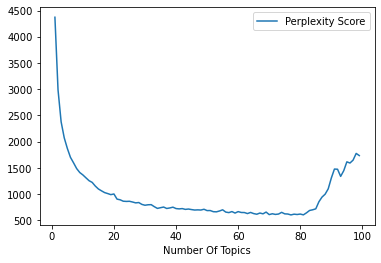

In [111]:
df_perplexity.plot.line("Number Of Topics",'Perplexity Score')

In [112]:
"""# 잠재 디리클레 할당을 사용한 토픽 모델링"""

# LDA 사용 (BoW 기반)

lda = LatentDirichletAllocation(n_components = 5,
                                random_state = 1,
                                learning_method = 'batch')

X_topics = lda.fit_transform(bag)

In [113]:
# 결과 분석을 위해 각 토픽 당 중요 단어 10개 출력 (BoW 기반)
n_top_word = 10
feature_name = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
  print("토픽 %d:" % (topic_idx+1))
  print([feature_name[i] for i in topic.argsort()[:-n_top_word - 1: -1]])

토픽 1:
['slip diamond life', 'one fine day', 'kstin hours viws', 'hours viws added', 'kstin hours viws added', 'september kst september', 'kst september kstin', 'september kstin hours', 'kst september kstin hours', 'september kst september kstin']
토픽 2:
['home home home', 'keep str ming', 'hit hit hit', 'keep str aming', 'hip hop team', 'balphang alphan sony ndalphan', 'balphang alphan sony', 'alphan sony ndalphan', 'seventeen seventeen seventeen', 'hit hit hit hit']
토픽 3:
['slipped diamond life', 'watch going seventeen', 'jikook better motzu', 'slipping diamond life', 'vote idol champ', 'appreciate dino everyone', 'seventeen world domination', 'jjak jjak jjak', 'let keep streaming', 'dawn hotter day']
토픽 4:
['dont wan cry', 'aju nice clap', 'attacca concept trailer', 'million million million', 'vote seventeen idol', 'seventeen idol champ', 'vote seventeen idol champ', 'clap left right', 'million million million million', 'lets work hard']
토픽 5:
['welcome diamond life', 'call call call'

In [114]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, bag, count)
pyLDAvis.display(vis)


In [115]:
pyLDAvis.save_html(vis, path2+'lda.html')

#  토크나이즈해서 dictionary 만든 후 작업, 즉 단어 1개씩

In [48]:
# gamma, _ = lda.inference(corpus)

In [49]:
en_sent[:10]

['even carat let admit song universal',
 'song tells song need billion views prove legendary',
 'fan say song another level',
 'years passed song still legend probably legacy passed different generation generation attacca released october hope able reach new milestone boys lately previous comebacks struggle make views together almost years ripe already still lack effort whilst seventeen work hard satisfy every menu aim make taste unending gose segments contents hope able pay back',
 'fan really like songs especially one deserves attention views',
 'funfact everyone agree successful comeback seventeen',
 'proof choreography need jumps flips beautifully done goes well music probably one favorites also video choreography danced speed left awe well synchronized',
 'forget fandom carat comes song',
 'proves songs need badass become addictive',
 'seventeen stan like guys deserves views likes masterpiece']

In [50]:
model = LatentDirichletAllocation(n_components = 5,
                                random_state = 1,
                                learning_method = 'batch')

model.fit(bag) # model.fit_transform(X) is also available

LatentDirichletAllocation(n_components=5, random_state=1)

In [51]:
tokenized_doc = data_en.comment.apply(lambda x: x.split()) # 토큰화

In [52]:
tokenized_doc

0        [even, if, you, re, not, a, carat, let, s, all...
1        [this, song, tells, that, some, song, s, don, ...
2        [not, a, fan, but, i, should, say, that, this,...
3        [4, years, have, passed, and, this, song, is, ...
4        [i, m, not, a, fan, of, them, but, i, really, ...
                               ...                        
68827    [im, updated, but, i, want, to, binge, watch, ...
68828    [anyways, im, currently, binge, watching, thei...
68829                [novesuity, dino, thank, you, tho, 🥰]
68830    [lui, quinto, did, you, watch, seventeen, proj...
68831    [막내온탑, seventeen, im, currently, watching, those]
Name: comment, Length: 68832, dtype: object

In [92]:
vectorizer = TfidfVectorizer(stop_words='english',
                        ngram_range=(3,6), # 유니그램 바이그램으로 사용
                        min_df = 3, # 3회 미만으로 등장하는 토큰은 무시
                        max_df =0.95 # 많이 등장한 단어 5%의 토큰도 무시
)

X = vectorizer.fit_transform(en_sent)
X.shape # TF-IDF 행렬의 크기 확인

(68832, 17025)

In [93]:
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

5

In [94]:
np.shape(svd_model.components_)

(5, 17025)

In [95]:
# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출

terms = vectorizer.get_feature_names() # 

def get_topics(components, feature_names, n=10):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('welcome diamond life', 0.99913), ('welcome diamond life dear', 0.01557), ('diamond life dear', 0.01532), ('welcome diamond life hope', 0.00757), ('diamond life hope', 0.00752), ('course welcome diamond', 0.00737), ('course welcome diamond life', 0.00737), ('welcome diamond life baby', 0.00717), ('diamond life baby', 0.00708), ('slip diamond life', 0.00671)]
Topic 2: [('slip diamond life', 0.99666), ('welcome slip diamond life', 0.02781), ('welcome slip diamond', 0.02777), ('slip diamond life regret', 0.02685), ('diamond life regret', 0.02565), ('slip diamond life welcome', 0.01804), ('shy slip diamond', 0.01784), ('shy slip diamond life', 0.0178), ('diamond life welcome', 0.01697), ('come slip diamond', 0.01596)]
Topic 3: [('kstin hours viws', 0.28401), ('kstin hours viws added', 0.28248), ('hours viws added', 0.28221), ('september kstin hours', 0.21177), ('kst september kstin hours', 0.21177), ('kst september kstin', 0.21177), ('september kst september', 0.21056), ('septem

In [96]:
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(11, 1), (12, 2), (13, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [97]:
print(dictionary[12])

song


In [98]:
len(dictionary)

50446

In [99]:
NUM_TOPICS = 5 #5개의 토픽, k=5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.051*"we" + 0.026*"s" + 0.024*"carats" + 0.021*"to" + 0.018*"let" + 0.018*"for" + 0.016*"it" + 0.015*"our" + 0.014*"views" + 0.014*"on"')
(1, '0.025*"he" + 0.023*"1" + 0.014*"is" + 0.013*"0" + 0.012*"s" + 0.012*"2" + 0.011*"woozi" + 0.010*"the" + 0.010*"his" + 0.010*"hoshi"')
(2, '0.076*"you" + 0.038*"thank" + 0.025*"to" + 0.025*"for" + 0.023*"seventeen" + 0.022*"the" + 0.022*"home" + 0.021*"thanks" + 0.017*"life" + 0.016*"welcome"')
(3, '0.038*"the" + 0.031*"and" + 0.026*"to" + 0.022*"i" + 0.020*"is" + 0.019*"a" + 0.019*"this" + 0.018*"they" + 0.017*"of" + 0.016*"that"')
(4, '0.130*"i" + 0.036*"m" + 0.029*"my" + 0.018*"me" + 0.016*"a" + 0.014*"this" + 0.014*"and" + 0.013*"carat" + 0.012*"so" + 0.012*"love"')


In [100]:
# import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

# pyLDAvis.enable_notebook()
# vis = pyLDAvis.sklearn.prepare(lda, corpus, terms)
# pyLDAvis.display(vis)

In [101]:
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis2)

In [102]:
pyLDAvis.save_html(vis2, path2+'lda_dic.html')

In [65]:
gamma, _ = ldamodel.inference(corpus)

In [67]:
# 차원축소?
topic_vector = ldamodel.expElogbeta
y = PCA(n_components=2).fit_transform(topic_vector)

print('{} -> {}'.format(topic_vector.shape, y.shape))
# (n_topics, n_terms) -> (n_topics, 2)

(5, 50446) -> (5, 2)


In [68]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.011994521), (1, 0.26214203), (2, 0.10513279), (3, 0.536143), (4, 0.084587656)]
1 번째 문서의 topic 비율은 [(0, 0.01064198), (1, 0.010933536), (2, 0.31977916), (3, 0.5824358), (4, 0.076209605)]
2 번째 문서의 topic 비율은 [(0, 0.013363313), (1, 0.013503024), (2, 0.013490398), (3, 0.8687154), (4, 0.090927854)]
3 번째 문서의 topic 비율은 [(0, 0.039298374), (1, 0.35568476), (2, 0.18949799), (3, 0.3189998), (4, 0.096519075)]
4 번째 문서의 topic 비율은 [(3, 0.9688215)]


In [69]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [70]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3.0,0.5361,"[(0, 0.011994543), (1, 0.2621373), (2, 0.10513..."
1,1,3.0,0.5824,"[(0, 0.010641964), (1, 0.010926948), (2, 0.319..."
2,2,3.0,0.8687,"[(0, 0.013363313), (1, 0.013503522), (2, 0.013..."
3,3,1.0,0.3557,"[(0, 0.039298445), (1, 0.3557071), (2, 0.18948..."
4,4,3.0,0.9688,"[(3, 0.96882373)]"
5,5,3.0,0.6695,"[(0, 0.015875798), (1, 0.28325585), (2, 0.0156..."
6,6,3.0,0.5778,"[(0, 0.09733696), (3, 0.5778384), (4, 0.316652..."
7,7,1.0,0.5324,"[(0, 0.01354079), (1, 0.5323985), (2, 0.013841..."
8,8,1.0,0.5398,"[(0, 0.0143236155), (1, 0.53979194), (2, 0.014..."
9,9,3.0,0.8396,"[(0, 0.010536054), (1, 0.12819965), (2, 0.0110..."


In [86]:
# topic_word = model.components_ # model.components_also works
# n_top_words = 5   # TOPIC으로 선정될 단어의 수

# for i, topic_dist in enumerate(topic_word):
#     topic_words = np.array(tokenized_doc)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
#     print("Topic {}:{}".format(i, ' '.join(topic_words)))

# dictionary = gensim.corpora.Dictionary(bag)
# print('dictionary size : %d' % len(dictionary)) # dictionary size : ????

# min_count = 10
# word_counter = Counter((word for words in documents for word in words))
# removal_word_idxs = {
#     dictionary.token2id[word] for word, count in word_counter.items()
#     if count < min_count
# }

# dictionary.filter_tokens(removal_word_idxs)
# dictionary.compactify()
# print('dictionary size : %d' % len(dictionary)) # dictionary size : 

# lda_model = LdaModel(bag, id2word=dictionary, num_topics=6)
# with open(lda_model_path, 'wb') as f:
#     pickle.dump(lda_model, f)

def get_topic_term_prob(lda_model):
    topic_term_freqs = lda_model.state.get_lambda()
    topic_term_prob = topic_term_freqs / topic_term_freqs.sum(axis=1)[:, None]
    return topic_term_prob

print(ldamodel.alpha.shape) # (n_topics,)
print(ldamodel.alpha.sum()) # 1.0

topic_term_prob = get_topic_term_prob(ldamodel)
print(topic_term_prob.shape)     # (n_topics, n_terms)
print(topic_term_prob[0].sum())  # 1.0

(5,)
1.0
(5, 50446)
0.99999994


In [ ]:
# TF_IDF 벡터화

tfidf = TfidfVectorizer(ngram_range=(3,6), # 유니그램 바이그램으로 사용
                        min_df = 3, # 3회 미만으로 등장하는 토큰은 무시
                        max_df =0.95 # 많이 등장한 단어 5%의 토큰도 무시
                        )
docs_tf = tfidf.fit_transform(docs)


# In[68]:
# LDA 사용 (tf-idf 기반)
lda_tfidf = LatentDirichletAllocation(n_components = 6,
                                      random_state = 1,
                                      learning_method = 'batch')

X_topics = lda_tfidf.fit_transform(docs_tf)


# In[37]:


# 결과 분석을 위해 각 토픽 당 중요 단어 10개 출력 (tf-idf 기반)
n_top_word = 5
feature_name = count.get_feature_names()
for topic_idx, topic in enumerate(lda_tfidf.components_):
  print("토픽 %d:" % (topic_idx+1))
  print([feature_name[i] for i in topic.argsort()[:-n_top_word - 1: -1]])



# rake

In [ ]:
# In[38]:


get_ipython().system('pip install rake-nltk')


# In[39]:


from rake_nltk import Rake

# raw= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/youtube/영상별 댓글/comments_youtube_aespa.csv',header=None)
# raw.columns=['comments','likes']
# raw

en_sent[:10]

text=". ".join(en_sent)


# In[40]:


r=Rake()
r.extract_keywords_from_text(text)
r.get_ranked_phrases_with_scores()[:5]


# In[72]:


r1=Rake()
r1.extract_keywords_from_sentences(en_sent[:10])
r1.get_ranked_phrases_with_scores()



# yake

In [ ]:
# In[42]:


get_ipython().system('pip install git+https://github.com/LIAAD/yake')


# In[43]:


import yake


# In[44]:


a=". ".join(en_sent)


# In[ ]:


a


# In[74]:


language = "en"
max_ngram_size = 2
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 3
numOfKeywords = 20

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(a)

for kw in keywords:
    print(kw)


# pke

In [ ]:
# In[46]:


get_ipython().system('pip install git+https://github.com/boudinfl/pke.git')
get_ipython().system('pip install spacy')
get_ipython().system('python3 -m spacy download en')


# In[47]:


import pke
import spacy
# nlp = spacy.load("en_core_web_sm")


# In[ ]:


for i in range(len(en_sent)):

    # initialize keyphrase extraction model, here TopicRank
    extractor = pke.unsupervised.TopicRank()

    # load the content of the document, here document is expected to be in raw
    # # format (i.e. a simple text file) and preprocessing is carried out using spacy
    extractor.load_document(input=en_sent[i], language='en_core_web_sm')
    extractor.candidate_selection(pos={'NOUN'})
    extractor.candidate_weighting(threshold=0.74,
                                  method='average')
    keyphrase_score=[]
    for (keyphrase, score) in extractor.get_n_best(n=2, stemming=False):
        print(keyphrase, score)
        keyphrase_score.extend((keyphrase, score))
        


# In[ ]:


keyphrase_score


# In[ ]:


with open('/home/lab10/final/key_score.txt', 'w') as f:
    for (keyphrase, score) in keyphrase_score:
        f.write((keyphrase, score))


# k-means

In [ ]:

# In[ ]:





# In[52]:


# 텍스트 단어들의 어근 원형을 추출하기 위해 함수 생성


# Tf-idf 벡터화시키면서 cusotmized해준 토큰화+어근추출 방식 tokenizer인자에 넣어주기
# 벡터화시킬 Tf-idf 도구 옵션 추가해서 구축
# 1,2gram적용, 빈도수 0.05이하, 0.85이상의 빈도수 단어들 제거
tfidf_vect = TfidfVectorizer(ngram_range=(1,2),
                            min_df=0.05, max_df=0.85)
# fit_transform으로 위에서 구축한 도구로 텍스트 벡터화
ftr_vect = tfidf_vect.fit_transform(en_sent)


# In[53]:


# K-means로 6개 군집으로 문서 군집화시키기


kmeans = KMeans(n_clusters=6, max_iter=10000, random_state=42)
# 비지도 학습이니 feature로만 학습시키고 예측
cluster_label = kmeans.fit_predict(ftr_vect)

# 군집화한 레이블값들을 document_df 에 추가하기
data_en['label'] = cluster_label
print(data_en.sort_values(by=['label']))


# In[54]:


# 문서의 feature(단어별) cluster_centers_확인해보자
cluster_centers = kmeans.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers)
# shape의 행은 클러스터 레이블, 열은 벡터화 시킨 feature(단어들)


# In[55]:


def get_cluster_details(cluster_model, cluster_data, feature_names,
                       cluster_num, top_n_features=5):
    cluster_details = {}
    # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    # 개별 클러스터 레이블별로 
    for cluster_num in range(cluster_num):
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # 각 feature별 center값들 정렬한 인덱스 중 상위 5개만 추출
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        # top_ftr_idx를 활용해서 상위 5개 feature들의 center값들 반환
        # 반환하게 되면 array이기 떄문에 리스트로바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()
        
        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val
        # 해당 cluster_num으로 분류된 파일명(문서들) 넣어주기
        comment = cluster_data[cluster_data['label']==cluster_num]['comment']
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        comment = comment.values.tolist()
        cluster_details[cluster_num]['comment'] = comment
    
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 5개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n{cluster_detail['comment'][:5]}")
        print('-'*20)

feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=kmeans,
                                     cluster_data=data_en,
                                     feature_names=feature_names,
                                     cluster_num=6,
                                     top_n_features=10)
print_cluster_details(cluster_details)



In [ ]:
# In[56]:


data_en.head()


# In[57]:


# 클러스터링된 문서들 중에서 특정 문서를 하나 선택한 후 비슷한 문서 추출
from sklearn.metrics.pairwise import cosine_similarity


# In[59]:


hotel_idx = data_en[data_en['label']==1].index
print("호텔 카테고리로 클러스터링된 문서들의 인덱스:\n",hotel_idx)
print()
# 호텔 카테고리로 클러스터링 된 문서들의 인덱스 중 하나 선택해 비교 기준으로 삼을 문서 선정
comparison_doc = data_en.iloc[hotel_idx[0]]['comment']
print("##유사도 비교 기준 문서 이름:",comparison_doc,'##')
print()

# 위에서 추출한 호텔 카테고리로 클러스터링된 문서들의 인덱스 중 0번인덱스(비교기준문서)제외한
# 다른 문서들과의 유사도 측정
similarity = cosine_similarity(ftr_vect[hotel_idx[0]], ftr_vect[hotel_idx])
# print(similarity)


In [ ]:
#  In[61]:


# 비교기준 문서와 다른 문서들간의 유사도 살펴보기
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# array 내림차순으로 정렬한 후 인덱스 반환 [:,::-1] 모든행에 대해서 열을 내림차순으로!
sorted_idx = similarity.argsort()[:,::-1]
# 비교문서 당사자는 제외한 인덱스 추출
sorted_idx = sorted_idx[:, 1:]

# 유사도가 큰 순으로 hotel_idx(label=1인 즉, 호텔과관련된 내용의 문서이름들의 index들)에서 재 정렬 
# index로 넣으려면 1차원으로 reshape해주기!
hotel_sorted_idx = hotel_idx[sorted_idx.reshape(-1,)]
# 유사도 행렬값들을 유사도가 큰 순으로 재정렬(비교 문서 당사자는 제외)
hotel_sim_values = np.sort(similarity.reshape(-1,))[::-1]
hotel_sim_values = hotel_sim_values[1:]
# 이렇게 되면 비교문서와 가장 유사한 순으로 '해당문서의index-유사도값' 으로 동일한 위치가 매핑된 두 개의 array!
# 그래서 그대로 데이터프레임의 각 칼럼으로 넣어주기
# print(hotel_sorted_idx)
# print(hotel_sim_values)
print()
print("길이 비교", len(hotel_sorted_idx), len(hotel_sim_values))
print()
# 빈 데이터프레임 생성
hotel_sim_df = pd.DataFrame()
# hotel_sorted_idx 와 hotel_sim_values 매핑시킨 array임
hotel_sim_df['comment'] = data_en.iloc[hotel_sorted_idx]['comment']
hotel_sim_df['similarity'] = hotel_sim_values

plt.figure(figsize=(15,10))
sns.barplot(data=hotel_sim_df[:10], x='similarity', y='comment')
plt.title(comparison_doc)


# In[62]:


from collections import Counter

def scan_vocabulary(sents, tokenize, min_count=2):
    counter = Counter(w for sent in sents for w in tokenize(sent))
    counter = {w:c for w,c in counter.items() if c >= min_count}
    idx_to_vocab = [w for w, _ in sorted(counter.items(), key=lambda x:-x[1])]
    vocab_to_idx = {vocab:idx for idx, vocab in enumerate(idx_to_vocab)}
    return idx_to_vocab, vocab_to_idx
    
from collections import defaultdict

def cooccurrence(tokens, vocab_to_idx, window=2, min_cooccurrence=2):
    counter = defaultdict(int)
    for s, tokens_i in enumerate(tokens):
        vocabs = [vocab_to_idx[w] for w in tokens_i if w in vocab_to_idx]
        n = len(vocabs)
        for i, v in enumerate(vocabs):
            if window <= 0:
                b, e = 0, n
            else:
                b = max(0, i - window)
                e = min(i + window, n)
            for j in range(b, e):
                if i == j:
                    continue
                counter[(v, vocabs[j])] += 1
                counter[(vocabs[j], v)] += 1
    counter = {k:v for k,v in counter.items() if v >= min_cooccurrence}
    n_vocabs = len(vocab_to_idx)
    return dict_to_mat(counter, n_vocabs, n_vocabs)
from scipy.sparse import csr_matrix

def dict_to_mat(d, n_rows, n_cols):
    rows, cols, data = [], [], []
    for (i, j), v in d.items():
        rows.append(i)
        cols.append(j)
        data.append(v)
    return csr_matrix((data, (rows, cols)), shape=(n_rows, n_cols))
def word_graph(sents, tokenize=None, min_count=2, window=2, min_cooccurrence=2):
    idx_to_vocab, vocab_to_idx = scan_vocabulary(sents, tokenize, min_count)
    tokens = [tokenize(sent) for sent in sents]
    g = cooccurrence(tokens, vocab_to_idx, window, min_cooccurrence, verbose)
    return g, idx_to_vocab
import numpy as np
from sklearn.preprocessing import normalize

def pagerank(x, df=0.85, max_iter=30):
    assert 0 < df < 1

    # initialize
    A = normalize(x, axis=0, norm='l1')
    R = np.ones(A.shape[0]).reshape(-1,1)
    bias = (1 - df) * np.ones(A.shape[0]).reshape(-1,1)

    # iteration
    for _ in range(max_iter):
        R = df * (A * R) + bias

    return R
def textrank_keyword(sents, tokenize, min_count, window, min_cooccurrence, df=0.85, max_iter=30, topk=30):
    g, idx_to_vocab = word_graph(sents, tokenize, min_count, window, min_cooccurrence)
    R = pagerank(g, df, max_iter).reshape(-1)
    idxs = R.argsort()[-topk:]
    keywords = [(idx_to_vocab[idx], R[idx]) for idx in reversed(idxs)]
    return keywords

from collections import Counter
from scipy.sparse import csr_matrix
import math

def sent_graph(sents, tokenize, similarity, min_count=2, min_sim=0.3):
    _, vocab_to_idx = scan_vocabulary(sents, tokenize, min_count)

    tokens = [[w for w in tokenize(sent) if w in vocab_to_idx] for sent in sents]
    rows, cols, data = [], [], []
    n_sents = len(tokens)
    for i, tokens_i in enumerate(tokens):
        for j, tokens_j in enumerate(tokens):
            if i >= j:
                continue
            sim = similarity(tokens_i, tokens_j)
            if sim < min_sim:
                continue
            rows.append(i)
            cols.append(j)
            data.append(sim)
    return csr_matrix((data, (rows, cols)), shape=(n_sents, n_sents))

def textrank_sent_sim(s1, s2):
    n1 = len(s1)
    n2 = len(s2)
    if (n1 <= 1) or (n2 <= 1):
        return 0
    common = len(set(s1).intersection(set(s2)))
    base = math.log(n1) + math.log(n2)
    return common / base

def cosine_sent_sim(s1, s2):
    if (not s1) or (not s2):
        return 0

    s1 = Counter(s1)
    s2 = Counter(s2)
    norm1 = math.sqrt(sum(v ** 2 for v in s1.values()))
    norm2 = math.sqrt(sum(v ** 2 for v in s2.values()))
    prod = 0
    for k, v in s1.items():
        prod += v * s2.get(k, 0)
    return prod / (norm1 * norm2)
def textrank_keysentence(sents, tokenize, min_count, similarity, df=0.85, max_iter=30, topk=5):
    g = sent_graph(sents, tokenize, min_count, min_sim, similarity)
    R = pagerank(g, df, max_iter).reshape(-1)
    idxs = R.argsort()[-topk:]
    keysents = [(idx, R[idx], sents[idx]) for idx in reversed(idxs)]
    return keysents


# In[ ]:



